In [1]:
# Let's import our dependencies. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Data Analysis Question 1:  Which zip codes in Miami have the highest home values as measured by housing prices? 

In [2]:
# Read merged CSV (can remove later)
miami_merged_data = pd.read_csv("miami_merged_data_with_API.csv")
miami_merged_data.head(20)

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,...,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality,post_code,school count,hosp count,rest count
0,25.664650,-80.454970,3059080100500,391000.0,7096,3181,1280,7864.9,52246.5,41626.8,...,47379.1,22018.5,22,0,3,4,33196,2.0,1.0,0.0
1,25.851443,-80.175251,132080090270,420000.0,5555,1565,0,4070.8,18512.6,326.1,...,26516.6,10578.8,21,0,8,4,33138,6.0,6.0,10.0
2,25.539853,-80.386774,3069240001921,360000.0,46871,2400,194,11110.2,18526.1,10559.4,...,59032.3,3600.5,17,0,6,4,33032,0.0,0.0,0.0
3,25.821264,-80.380662,3530190022210,465000.0,4151,2253,3309,8771.4,57951.2,20335.1,...,47818.3,1899.8,19,0,4,5,33178,2.0,0.0,0.0
4,25.916466,-80.171423,722170181250,245000.0,4500,1318,1562,3212.8,16424.2,2745.2,...,47633.0,10676.0,21,0,12,4,33162,7.0,3.0,0.0
5,25.594855,-80.391073,3069010210310,295000.0,7505,1871,42034,8270.3,27070.5,10389.4,...,42503.6,5072.5,25,0,11,2,33177,2.0,0.0,0.0
6,25.719335,-80.258962,141290100070,614300.0,6000,1333,21388,2661.8,3781.9,2340.7,...,10960.6,18986.8,51,0,3,5,33133,10.0,7.0,3.0
7,25.592818,-80.404990,3069020260660,449500.0,17884,3258,65262,8026.7,31656.4,12812.5,...,45930.9,9582.5,9,0,9,2,33177,1.0,0.0,0.0
8,25.630922,-80.423221,3059220081040,245000.0,4693,1576,0,809.0,38682.0,25939.9,...,41739.7,12611.7,30,0,5,4,33186,1.0,0.0,1.0
9,25.566954,-80.334610,3660160060850,215000.0,4080,1260,0,13859.1,9008.9,7459.6,...,44650.4,9249.7,9,0,3,4,33189,2.0,1.0,0.0


In [3]:
# Check to see how many zip codes are listed as 0
miami_merged_data['post_code'].value_counts()

0        115
33177     37
33033     31
33157     29
33176     28
        ... 
33172      1
33197      1
33160      1
33283      1
32186      1
Name: post_code, Length: 78, dtype: int64

In [4]:
# Total number of unique zip codes
zip_count = len(miami_merged_data['post_code'].unique())
zip_count

78

In [5]:
# Filter data to rows with zip codes
post_code_df = miami_merged_data.loc[(miami_merged_data['post_code'] > 0)]
                            
post_code_df.head()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,...,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality,post_code,school count,hosp count,rest count
0,25.664650,-80.454970,3059080100500,391000.0,7096,3181,1280,7864.9,52246.5,41626.8,...,47379.1,22018.5,22,0,3,4,33196,2.0,1.0,0.0
1,25.851443,-80.175251,132080090270,420000.0,5555,1565,0,4070.8,18512.6,326.1,...,26516.6,10578.8,21,0,8,4,33138,6.0,6.0,10.0
2,25.539853,-80.386774,3069240001921,360000.0,46871,2400,194,11110.2,18526.1,10559.4,...,59032.3,3600.5,17,0,6,4,33032,0.0,0.0,0.0
3,25.821264,-80.380662,3530190022210,465000.0,4151,2253,3309,8771.4,57951.2,20335.1,...,47818.3,1899.8,19,0,4,5,33178,2.0,0.0,0.0
4,25.916466,-80.171423,722170181250,245000.0,4500,1318,1562,3212.8,16424.2,2745.2,...,47633.0,10676.0,21,0,12,4,33162,7.0,3.0,0.0


In [6]:
# Checking filter for total number of unique zip codes
zip_count_filtered = len(post_code_df['post_code'].unique())
zip_count_filtered

# All good at 77

77

In [7]:
# Check the names of all the columns
post_code_df.count()

LATITUDE             835
LONGITUDE            835
PARCELNO             835
SALE_PRC             835
LND_SQFOOT           835
TOT_LVG_AREA         835
SPEC_FEAT_VAL        835
RAIL_DIST            835
OCEAN_DIST           835
WATER_DIST           835
CNTR_DIST            835
SUBCNTR_DI           835
HWY_DIST             835
age                  835
avno60plus           835
month_sold           835
structure_quality    835
post_code            835
school count         825
hosp count           825
rest count           825
dtype: int64

In [8]:
# Reduce to columns of interest
post_code_df_reduced = post_code_df[["SALE_PRC", "LND_SQFOOT", "TOT_LVG_AREA", 
                          "RAIL_DIST", "OCEAN_DIST", "WATER_DIST", 
                          "CNTR_DIST", "SUBCNTR_DI", "HWY_DIST", "age", 
                          "post_code", "school count", 
                          "hosp count", "rest count"]]
post_code_df_reduced.head()

,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,post_code,school count,hosp count,rest count
0,391000.0,7096,3181,7864.9,52246.5,41626.8,95417.8,47379.1,22018.5,22,33196,2.0,1.0,0.0
1,420000.0,5555,1565,4070.8,18512.6,326.1,27723.2,26516.6,10578.8,21,33138,6.0,6.0,10.0
2,360000.0,46871,2400,11110.2,18526.1,10559.4,107067.5,59032.3,3600.5,17,33032,0.0,0.0,0.0
3,465000.0,4151,2253,8771.4,57951.2,20335.1,63908.4,47818.3,1899.8,19,33178,2.0,0.0,0.0
4,245000.0,4500,1318,3212.8,16424.2,2745.2,51242.3,47633.0,10676.0,21,33162,7.0,3.0,0.0


In [9]:
# Group by zip code and see the median value of each
post_code_median_values = post_code_df_reduced.groupby(["post_code"]).median()
post_code_median_values.head()

,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,school count,hosp count,rest count
post_code,,,,,,,,,,,,,
32122,1092100.0,4622.5,3871.0,3513.55,41551.25,3484.55,46408.15,31114.65,2930.90,0.0,2.0,3.0,7.0
32186,305000.0,4870.0,2282.0,15824.60,46937.50,40204.50,84771.30,37832.80,12911.00,22.0,4.0,2.0,4.0
33010,252000.0,6820.0,1631.5,867.40,37973.05,4328.50,32704.95,31250.20,7088.10,62.5,4.5,2.5,0.0
33012,303500.0,7763.0,1767.0,8047.25,52993.55,8381.25,46971.40,45572.90,9172.20,33.5,8.0,3.0,0.0
33013,246300.0,6875.0,1386.0,4329.30,48147.45,9218.55,41598.60,41598.60,16069.65,60.0,6.5,2.0,0.0


In [10]:
# List zips in descending order to see top 10 median sale price zips
highest_sales_price_zips = post_code_median_values.sort_values("SALE_PRC", ascending=False)
highest_sales_price_zips.head(10)


,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,school count,hosp count,rest count
post_code,,,,,,,,,,,,,
33149,2450000.0,8379.0,2784.5,24198.70,703.10,675.90,30834.30,30834.30,23970.15,21.5,2.0,0.0,3.0
33160,2400000.0,10796.0,4796.0,9141.40,435.70,312.80,53750.20,53750.20,14994.20,13.0,0.0,2.0,1.0
33137,1330000.0,13042.0,3197.0,1543.00,21557.70,1003.60,14978.20,14978.20,2229.90,58.0,2.0,11.0,22.0
33129,1227500.0,6875.0,3571.5,1823.50,3857.05,3588.95,8999.05,8999.05,2010.90,8.0,6.0,9.0,3.0
33140,1200000.0,7701.0,1871.0,19364.60,2979.20,584.00,28709.70,14489.20,6835.90,28.0,1.0,1.0,0.0
32122,1092100.0,4622.5,3871.0,3513.55,41551.25,3484.55,46408.15,31114.65,2930.90,0.0,2.0,3.0,7.0
33146,995000.0,10000.0,3052.0,2685.00,7549.10,1245.10,33976.20,12214.80,15531.60,22.0,9.0,6.0,1.0
33181,965000.0,9375.0,2372.5,3779.45,9924.95,2.80,46120.75,39548.45,18812.15,42.0,1.0,2.0,6.0
33156,895000.0,19896.0,3212.0,4397.60,14983.60,10421.70,57293.80,8117.90,4711.90,23.0,7.0,5.0,1.0


In [11]:
# list(top_ten_zips_df.columns)
top_ten_zips_df = pd.DataFrame(highest_sales_price_zips.loc[highest_sales_price_zips['SALE_PRC']>672000.0,:])

temp_df = top_ten_zips_df.reset_index()
top_ten_zips_df = temp_df[['post_code', 'SALE_PRC']]
top_ten_zips_df

,post_code,SALE_PRC
0,33149,2450000.0
1,33160,2400000.0
2,33137,1330000.0
3,33129,1227500.0
4,33140,1200000.0
5,32122,1092100.0
6,33146,995000.0
7,33181,965000.0
8,33156,895000.0
9,33178,672050.0


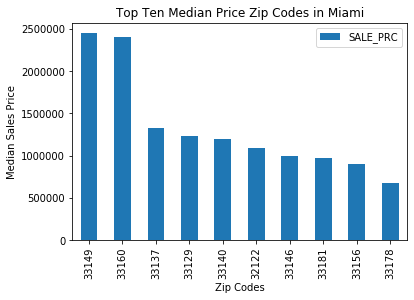

<Figure size 432x288 with 0 Axes>

In [12]:
# Top 10 median sale price zips: bar chart

# Chart data
top_ten_chart = top_ten_zips_df.plot.bar(x='post_code', y='SALE_PRC', title="Top Ten Median Price Zip Codes in Miami")
top_ten_chart.set_xlabel("Zip Codes")
top_ten_chart.set_ylabel("Median Sales Price")
plt.xticks(rotation=90)
plt.savefig("zipsbar.png")
plt.show()
plt.tight_layout()



In [13]:
# Group by zip code and see the count of each column
post_code_count_values = post_code_df_reduced.groupby(["post_code"]).count()
post_code_count_values.head()

,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,school count,hosp count,rest count
post_code,,,,,,,,,,,,,
32122,2,2,2,2,2,2,2,2,2,2,2,2,2
32186,1,1,1,1,1,1,1,1,1,1,1,1,1
33010,6,6,6,6,6,6,6,6,6,6,6,6,6
33012,12,12,12,12,12,12,12,12,12,12,12,12,12
33013,8,8,8,8,8,8,8,8,8,8,8,8,8


In [14]:
# List zips in descending order to see top 10 home sales zips
most_sales_zips = post_code_count_values.sort_values("SALE_PRC", ascending=False)
most_sales_zips.head(10)
# Number of houses sold per zip
# Show top 10 zip codes for most sales and plot as bar or pie

,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,school count,hosp count,rest count
post_code,,,,,,,,,,,,,
33177,37,37,37,37,37,37,37,37,37,37,37,37,37
33033,31,31,31,31,31,31,31,31,31,31,31,31,31
33157,29,29,29,29,29,29,29,29,29,29,29,29,29
33176,28,28,28,28,28,28,28,28,28,28,28,28,28
33196,28,28,28,28,28,28,28,28,28,28,28,28,28
33032,26,26,26,26,26,26,26,26,26,26,26,26,26
33162,24,24,24,24,24,24,24,24,24,24,24,24,24
33186,24,24,24,24,24,24,24,24,24,24,24,24,24
33189,23,23,23,23,23,23,23,23,23,23,21,21,21


In [15]:
# list(top_ten_zips_df.columns)
top_ten_zip_counts = pd.DataFrame(most_sales_zips.loc[most_sales_zips['SALE_PRC']>21,:])


zip_count_df = top_ten_zip_counts.reset_index()
top_ten_zip_counts = zip_count_df[['post_code', 'SALE_PRC']]
top_ten_zip_counts

,post_code,SALE_PRC
0,33177,37
1,33033,31
2,33157,29
3,33176,28
4,33196,28
5,33032,26
6,33162,24
7,33186,24
8,33189,23
9,33155,22


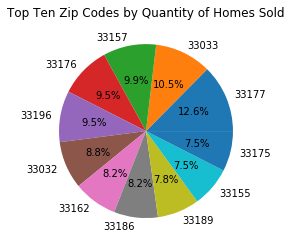

In [19]:
# Top 10 quantity home sales zips: pie chart

plt.pie(top_ten_zip_counts['SALE_PRC'], labels=top_ten_zip_counts['post_code'], autopct='%1.1f%%')
plt.title('Top Ten Zip Codes by Quantity of Homes Sold')

plt.savefig("zipspie.png")
plt.show()
